In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [6]:
Base = automap_base()


In [7]:
Base.prepare(engine, reflect=True)


In [8]:
Base.classes.keys()

['measurement', 'station']

In [9]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
session = Session(engine)


In [11]:
prev_year = dt.date(2017, 8, 23)


In [12]:
results = []


In [13]:
results = session.query(Measurement.date, Measurement.prcp)


In [14]:
print(results.all())


[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [15]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


In [16]:
df = pd.DataFrame(results, columns=['date','precipitation'])


In [17]:
df.set_index(df['date'], inplace=True)


In [18]:
print(df)


                  date  precipitation
date                                 
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.08
2017-08-23  2017-08-23           0.45


In [19]:
print(df.to_string(index=False))


      date  precipitation
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45


In [20]:
df = df.sort_index()


In [21]:
print(df.to_string(index=False))


      date  precipitation
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45


<AxesSubplot:xlabel='date'>

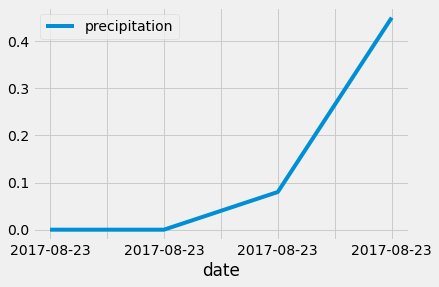

In [22]:
df.plot()


In [23]:
df.describe()


,precipitation
count,4.0000
mean,0.1325
std,0.2150
min,0.0000
25%,0.0000
50%,0.0400
75%,0.1725
max,0.4500


In [24]:
session.query()


In [25]:
session.query(func.count(Station.station))


In [26]:
session.query(func.count(Station.station)).all()


[(9,)]

In [27]:
session.query()


In [28]:
session.query(Measurement.station, func.count(Measurement.station))


In [29]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)

In [30]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

In [31]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
session.query()


In [33]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))


In [34]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')

In [35]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [36]:
session.query(Measurement.tobs)

In [37]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281')

In [38]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [39]:
print(results)


[]


In [40]:
df = pd.DataFrame(results, columns=['tobs'])


In [41]:
df.plot.hist(bins=12)


TypeError: no numeric data to plot

In [ ]:
plt.tight_layout()


In [ ]:
# reflect an existing database into a new model

# reflect the tables


In [ ]:
# We can view all of the classes that automap found


In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge